In [45]:
import creators
import creatures
import crossovers
import evaluators
import evolution
import mutators
import selects
import logger
import numpy as np

import random

In [46]:
a = sum([1, 3, 5, 10])
b = evaluators.get_product_of_list([2, 4, 6, 7, 8, 9])
n = 10

In [47]:
creature_class = creatures.DeckCreature
population_size = 10

In [48]:
sel_rng = np.random.RandomState()
cross_rng = random.Random()
mut_rng = random.Random()

In [49]:
evaluators_configs = [
    #evaluators.DistanceSumDeckEvaluator(a, b),
    #evaluators.NormalizedDistanceSumDeckEvaluator(a, b),
    #evaluators.NormalizedMeanDeckEvaluator(a, b),
    evaluators.LogarithmicMeanDeckEvaluator(a, b)
]

selects_configs = [
    selects.FromTheLowestFitnessesSelection(),
    selects.SwapRandomSelection(0.01, sel_rng),
    selects.TanhSelection(sel_rng),
    selects.ExponentialSelection(1.2, sel_rng)
]

crossovers_configs = [
    #crossovers.SinglePointCrossover(creature_class, 3/n),
    #crossovers.RandomSinglePointCrossover(creature_class, cross_rng),
    #crossovers.MultiPointCrossover(creature_class, [0.25, 0.5, 0.75]),
    #crossovers.RandomMultiPointCrossover(creature_class, 3, cross_rng),
    crossovers.RandomIndependentCrossover(creature_class, cross_rng)
]

mutators_configs = [
    #mutators.RandomIndependentSwitchMutator(creature_class, (0.1), mut_rng),
    mutators.RandomIndependentSwapMutator(creature_class, 0.05, mut_rng)
]

In [50]:
satisfactory_level = 1.0
results = []

for evaluator in evaluators_configs:
    for crossover in crossovers_configs:
        for select in selects_configs:
            for mutator in mutators_configs:
                sel_rng.seed(23)
                cross_rng.seed(345)
                mut_rng.seed(123)
                l = logger.Logger()
                evol = evolution.Evolution(creators.RandomCreator(creature_class, n, random.Random(1)),
                                           evaluator,
                                           select,
                                           crossover,
                                           mutator,
                                           population_size)
                best = evol.evolve_until_satisfied(satisfactory_level, l)
                results.append((evaluator, select, crossover, mutator, best, l))

Set values:
A:  19
B:  24192

Configuration LogarithmicMeanDeckEvaluator, FromTheLowestFitnessesSelection, RandomIndependentCrossover, RandomIndependentSwapMutator:

87
0.0
1.0

A:  [1, 3, 5, 10] , sum:  19
B:  [2, 4, 6, 7, 8, 9] , product:  24192


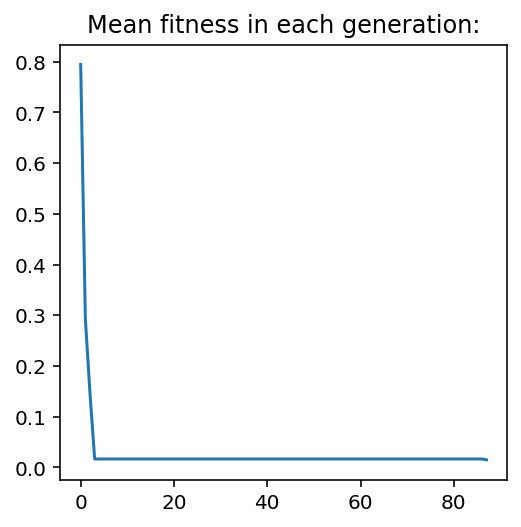

Configuration LogarithmicMeanDeckEvaluator, SwapRandomSelection, RandomIndependentCrossover, RandomIndependentSwapMutator:

87
0.0
1.0

A:  [1, 3, 5, 10] , sum:  19
B:  [2, 4, 6, 7, 8, 9] , product:  24192


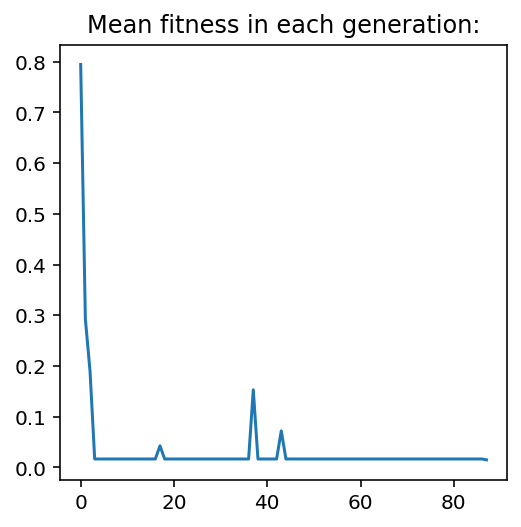

Configuration LogarithmicMeanDeckEvaluator, TanhSelection, RandomIndependentCrossover, RandomIndependentSwapMutator:

390
0.0
1.0

A:  [1, 3, 5, 10] , sum:  19
B:  [2, 4, 6, 7, 8, 9] , product:  24192


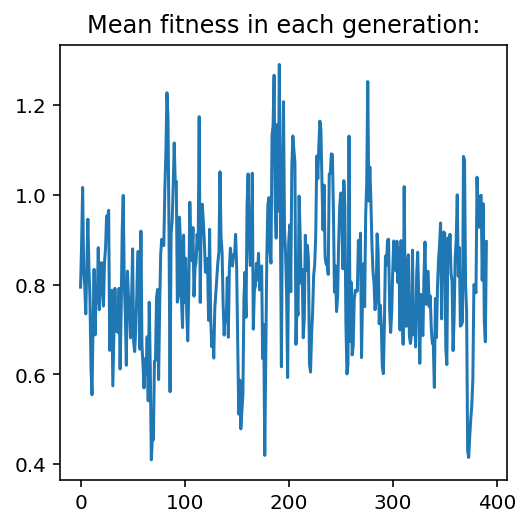

Configuration LogarithmicMeanDeckEvaluator, ExponentialSelection, RandomIndependentCrossover, RandomIndependentSwapMutator:

454
0.0
1.0

A:  [1, 3, 5, 10] , sum:  19
B:  [2, 4, 6, 7, 8, 9] , product:  24192


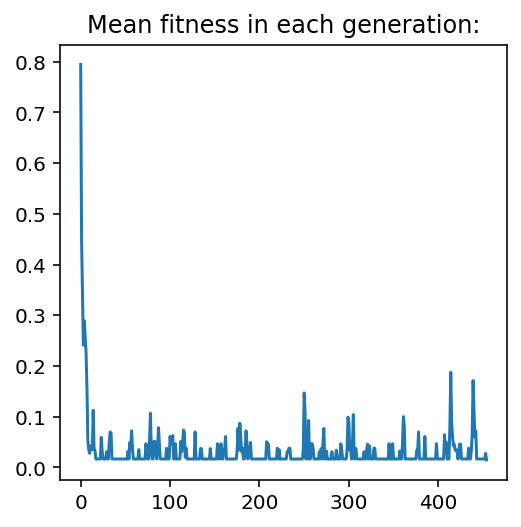

In [51]:
print("Set values:")
print("A: ", a)
print("B: ", b)
print()

for evaluator, select, crossover, mutator, best, log in results:
    print("Configuration {}, {}, {}, {}:".format(evaluator.__class__.__name__, select.__class__.__name__, crossover.__class__.__name__, mutator.__class__.__name__))
    print()
    print("Generations: ", log.current_gen)
    print("End fitness: ", log.lowests[-1])
    print("End matching: ", log.matchings[-1])
    print()
    print("A: ", best.get_stack(True), ", sum: ", evaluators.get_sum_on_stack(best, True))
    print("B: ", best.get_stack(False), ", product: ", evaluators.get_product_on_stack(best, False))
    log.plot_mean(figsize=(4,4))